In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder


In [2]:
# Loading the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv");

## FEATURE NAME  &  DECRIPTION OF THE DATASET

gender - Gender of the individual (e.g., 'Male', 'Female').

age - Age of the individual in years.

hypertension - Whether the individual has hypertension (0 = No, 1 = Yes).

heart_disease - Whether the individual has heart disease (0 = No, 1 = Yes).

smoking_history - Smoking history of the individual (e.g., 'never', 'former', 'current').

bmi -  Body Mass Index (BMI) of the individual.

HbA1c_level -  Hemoglobin A1c level, indicating average blood sugar levels over the past 3 months.

blood_glucose_level -  Current blood glucose level of the individual.

diabetes -  Target variable indicating whether the individual has diabetes (0 = No, 1 = Yes).

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB




From the information displayed above, there are 100,000 rows of patients' details with no missing values, all variables appear to be in their correct datatype

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


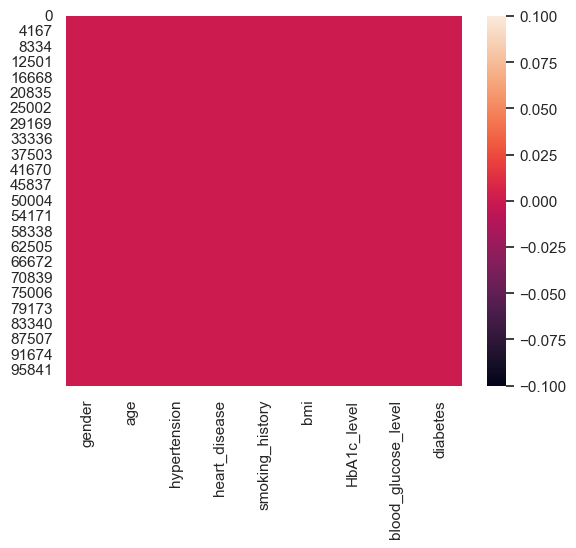

In [8]:
# Reconfirming missing values and visualizing them
print(df.isnull().sum())
sns.heatmap(df.isnull());

The above chart confirms that there are no missing values in the dataset. 

In [10]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [11]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Text(0.5, 1.0, 'Box Plot for HbA1c_level')

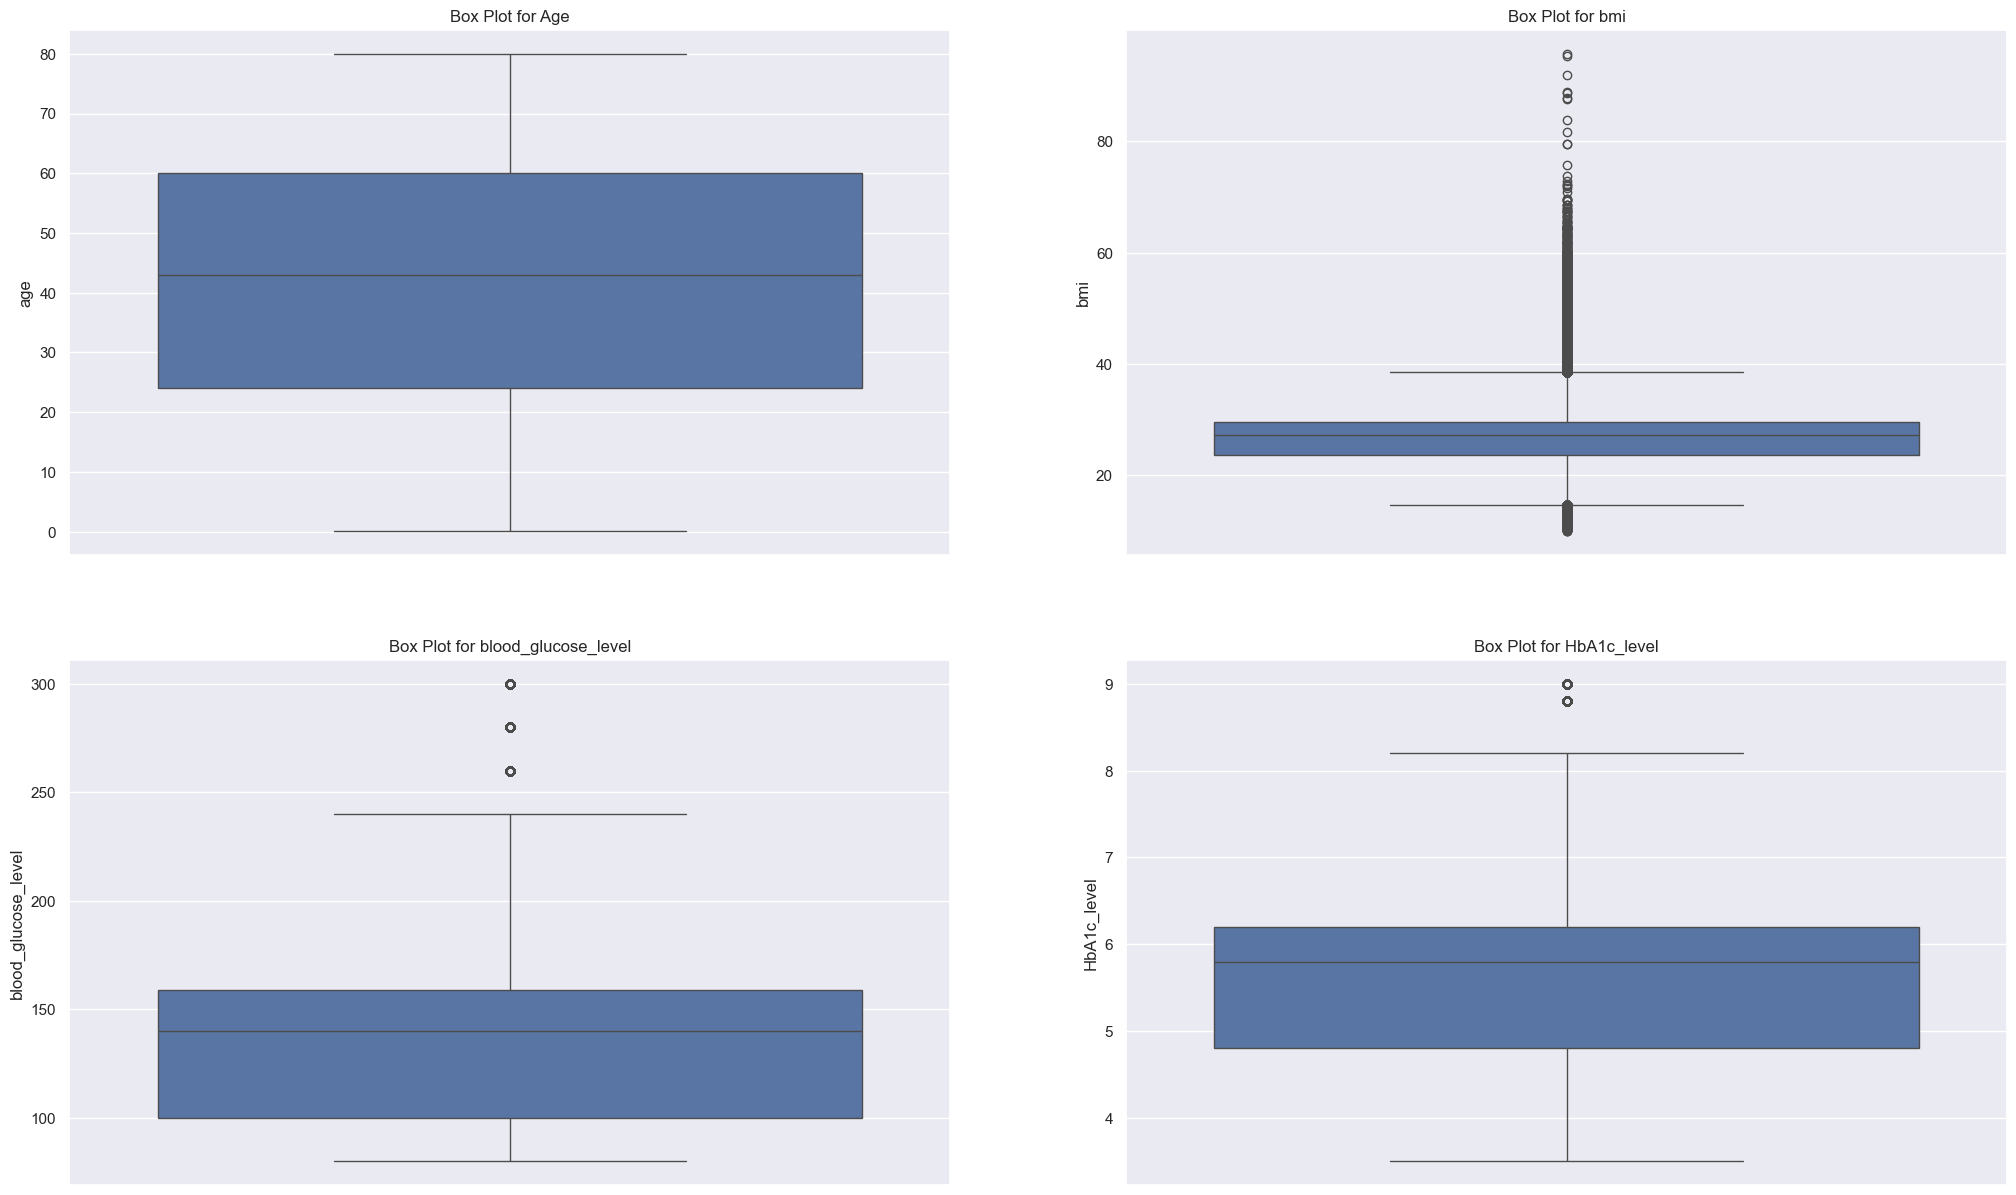

In [12]:
# Checking for outliers

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
sns.boxplot(y="age", data = df, ax=axs[0,0])
axs[0,0].set_title("Box Plot for Age")

sns.boxplot(y="bmi", data = df, ax=axs[0,1])
axs[0,1].set_title("Box Plot for bmi")

sns.boxplot(y="blood_glucose_level", data = df, ax=axs[1,0])
axs[1,0].set_title("Box Plot for blood_glucose_level")

sns.boxplot(y="HbA1c_level", data = df, ax=axs[1,1])
axs[1,1].set_title("Box Plot for HbA1c_level")

We found some values above the upper bounds which indicates the presence of certain outliers, I will however revisit this later and decide how to handle them as the analysis progresses. 

In [14]:
# Checking for duplicates
df.duplicated().sum()

3854

There are about 3854 duplicated data in our dataset, and will go ahead to drop them in the steps below, this is to ensure our data is clean and uphold the integrity of the data used to train the model for prediction.

In [16]:
# dropping the duplicates
df.drop_duplicates(inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


The size of our data is now reduced to 96146 as observed above.

In [18]:
# reconfirming duplicates
df.duplicated().sum()

0

All duplicates in the data set has been removed.

## Exploratory Data Analysis (EDA) and Feature Engineering
### Univariate Analysis

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


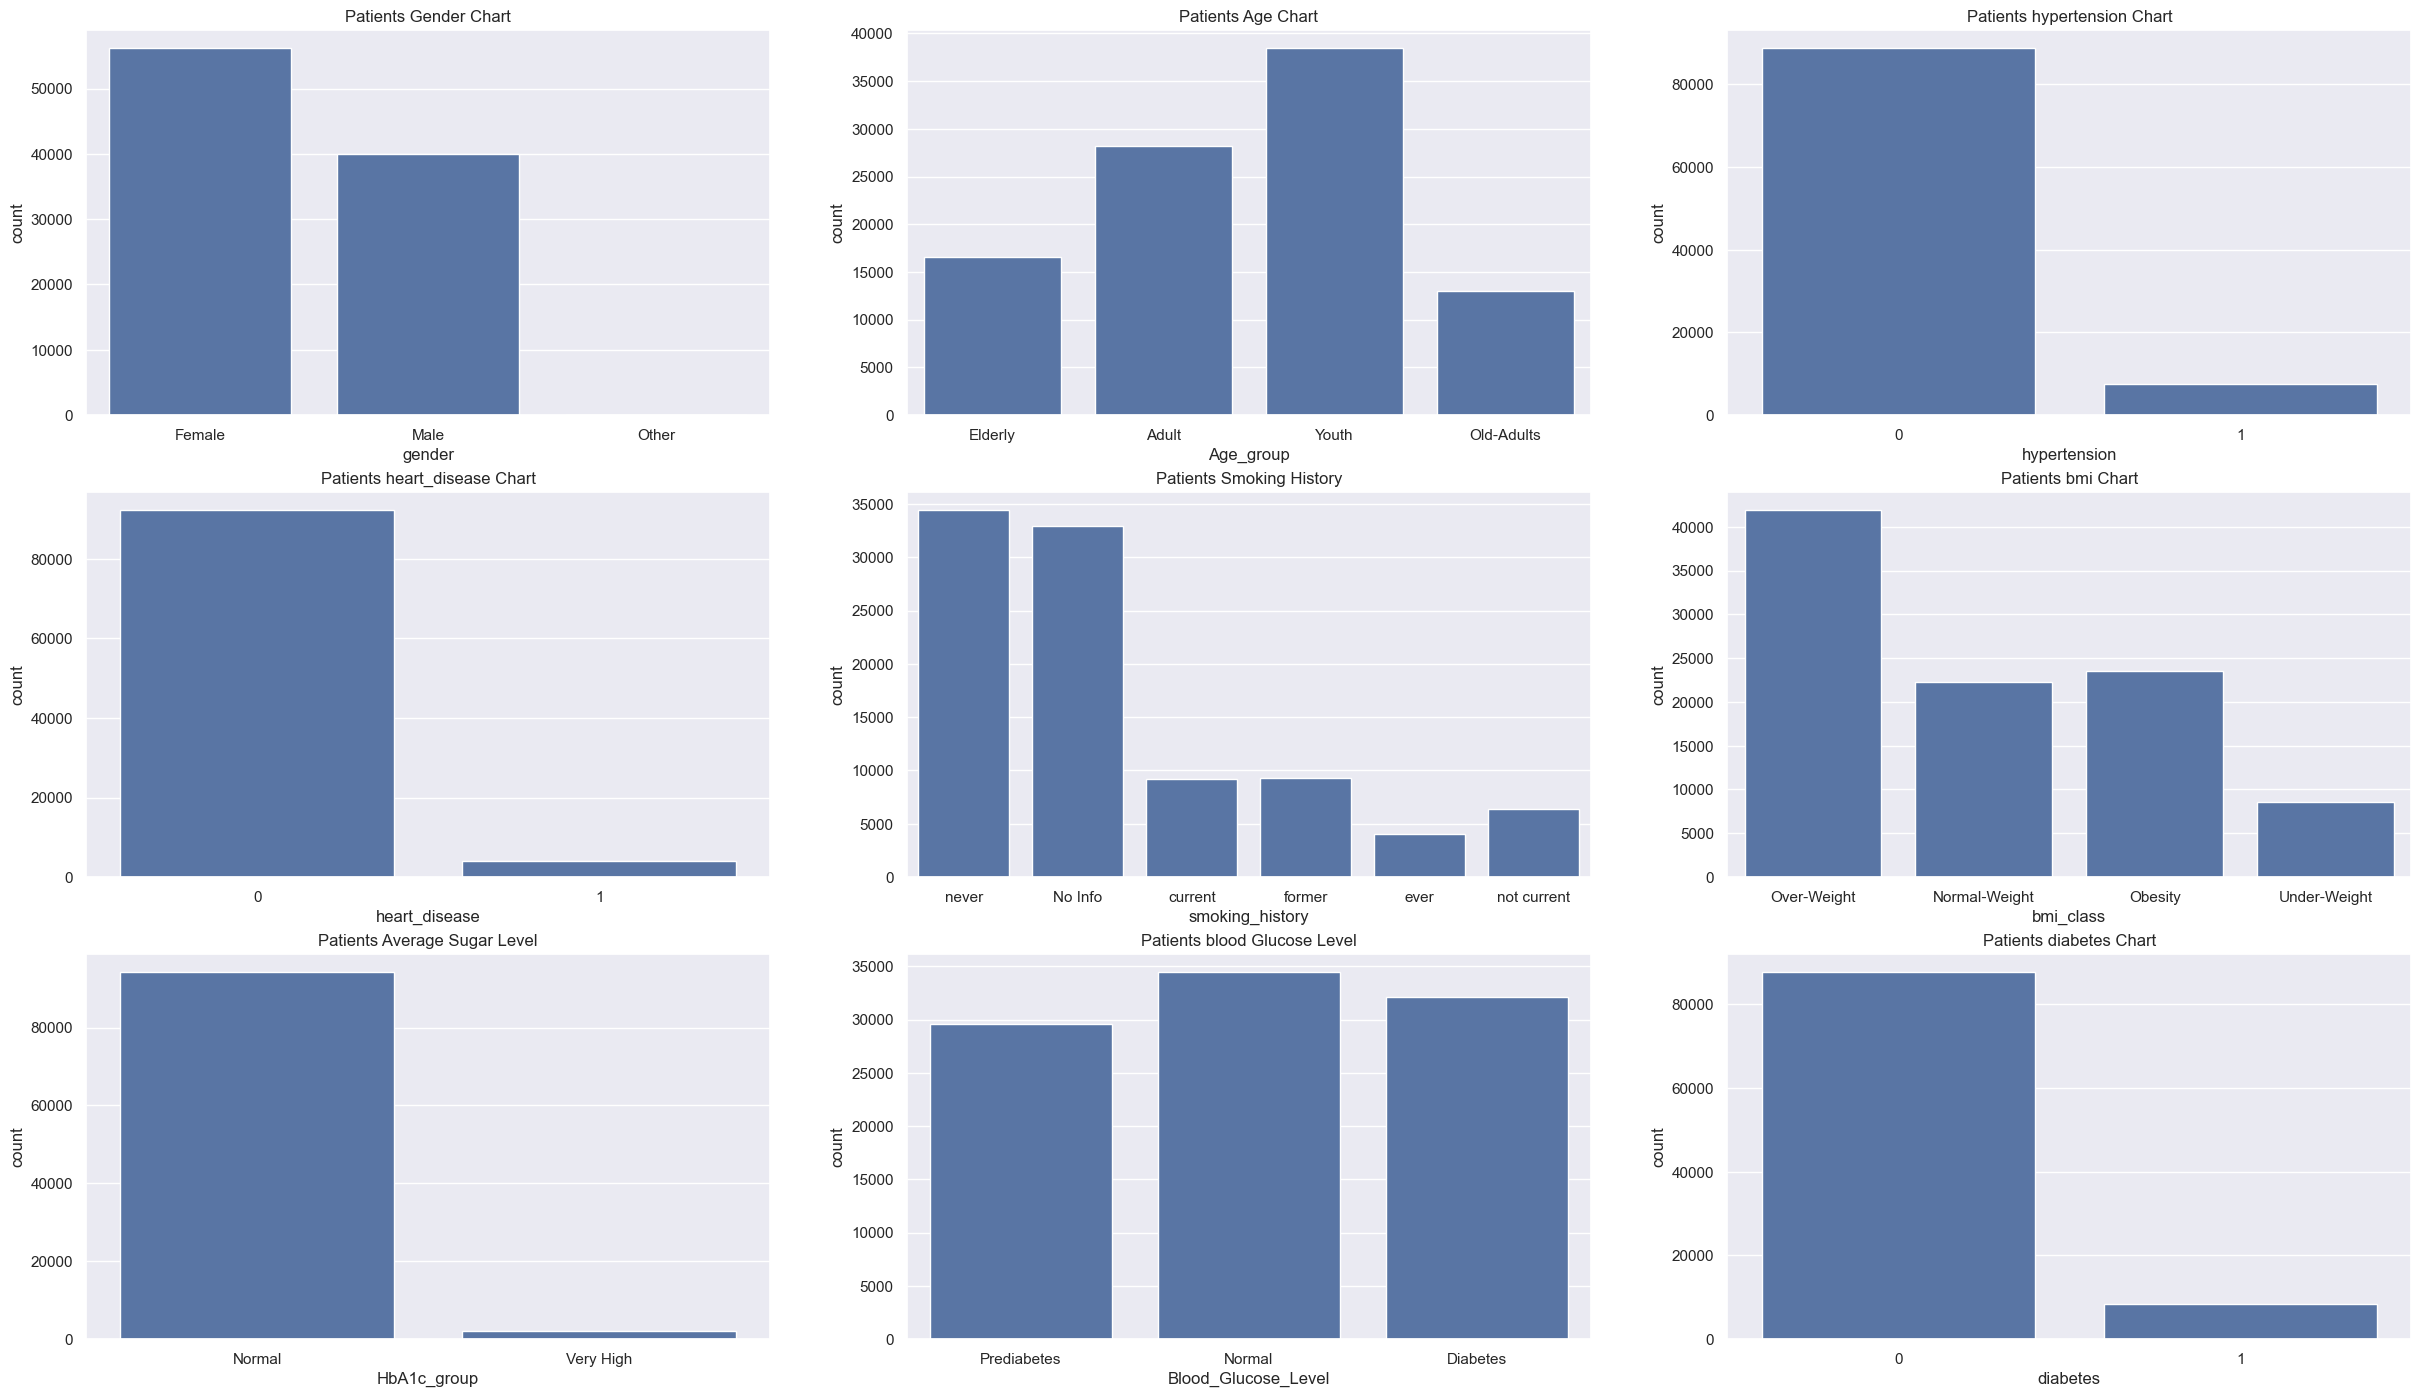

In [29]:
# Exploring the inidivual features of the dataset for possible insights

print(df["gender"].value_counts())

# Creating age and bmi group to enable categorize and visualize age in differet brackets / groups
def age_grade(age):
    if age <= 35:
        return "Youth"
    elif age <=55:
        return "Adult"
    elif age <= 65:
        return "Old-Adults"
    else:
        return "Elderly"

df["Age_group"] = df["age"].apply(age_grade)    

def BMI_class(bmi):
    if bmi <= 18.5:
        return "Under-Weight"
    elif bmi <=25:
        return "Normal-Weight"
    elif bmi <= 30:
        return "Over-Weight"
    else:
        return "Obesity"

df["bmi_class"] = df["bmi"].apply(BMI_class)   

# Grouping Blood and Sugar levels for easy analysis and visualization using NHS diabetes chart standards
# https://blog.yodadiagnostics.com/wp-content/uploads/2023/11/3.png

def HbA1c_grade(hemo):
    if hemo <= 3:
        return "Very Low"
    elif hemo <=8:
        return "Normal"
    else:
        return "Very High"

df["HbA1c_group"] = df["HbA1c_level"].apply(HbA1c_grade)

def blood_glucose(gluc):
    if gluc <= 126:
        return "Normal"
    elif gluc <=155:
        return "Prediabetes"
    else:
        return "Diabetes"

df["Blood_Glucose_Level"] = df["blood_glucose_level"].apply(blood_glucose)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30,17))
sns.countplot(x="gender", data=df, ax=axs[0,0])
axs[0,0].set_title("Patients Gender Chart")

sns.countplot(x= "Age_group", data=df, ax=axs[0,1])
axs[0,1].set_title("Patients Age Chart")

sns.countplot(x= "hypertension", data=df, ax=axs[0,2])
axs[0,2].set_title("Patients hypertension Chart")

sns.countplot(x= "heart_disease", data=df, ax=axs[1,0])
axs[1,0].set_title("Patients heart_disease Chart")

sns.countplot(x= "smoking_history", data=df, ax=axs[1,1])
axs[1,1].set_title("Patients Smoking History")

sns.countplot(x= "bmi_class", data=df, ax=axs[1,2])
axs[1,2].set_title("Patients bmi Chart")

sns.countplot(x="HbA1c_group", data=df, ax=axs[2,0])
axs[2,0].set_title("Patients Average Sugar Level")

sns.countplot(x= "Blood_Glucose_Level", data=df, ax=axs[2,1])
axs[2,1].set_title("Patients blood Glucose Level")

sns.countplot(x= "diabetes", data=df, ax=axs[2,2])
axs[2,2].set_title("Patients diabetes Chart");

The gender feature shows slightly more female than male in our dataset, while the age group chart shows we have more patients in the Adult and Youth group under review in our data. 

The hypertension chart also reveals that a lot of patients under review are not hypertensive, neither do they have heart disease associated.

Reviewing the Smoking history chart, the majority of patients has never had a fag and also no information recorded for the next largest group(No info).

Majority of patients under review presented with over-weight BMI while slightly above the normal weighted are obese.

A lot of patients are within the Normal Sugar Level margins while we have a lot more with pre-diabetes and diabetes status. 

The dataset cotains more patients without diabetes under review.

In [34]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Age_group,bmi_class,HbA1c_group,Blood_Glucose_Level
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly,Over-Weight,Normal,Prediabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Adult,Over-Weight,Normal,Normal
2,Male,28.0,0,0,never,27.32,5.7,158,0,Youth,Over-Weight,Normal,Diabetes
3,Female,36.0,0,0,current,23.45,5.0,155,0,Adult,Normal-Weight,Normal,Prediabetes
4,Male,76.0,1,1,current,20.14,4.8,155,0,Elderly,Normal-Weight,Normal,Prediabetes


In [35]:
# The smoking history feature has a bit more inconsistent data and needs to be reviewed or cleaned further.
df["smoking_history"] = df["smoking_history"].replace({"ever": "current", "former": "not current"})

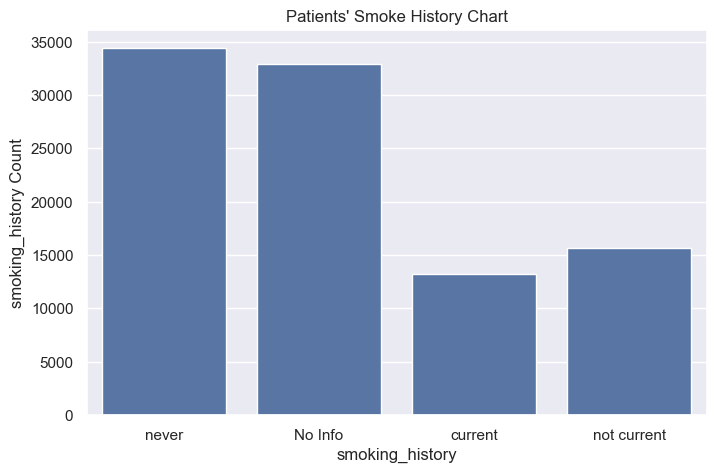

In [36]:
# Replaced inconsistent data visualizing the counts
df["smoking_history"].value_counts()
plt.figure(figsize=(8,5))
sns.countplot(x= df["smoking_history"], data=df)
plt.title("Patients' Smoke History Chart")
plt.ylabel("smoking_history Count")
plt.xlabel("smoking_history");

### Bivariate Analysis

In [42]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Age_group,bmi_class,HbA1c_group,Blood_Glucose_Level
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly,Over-Weight,Normal,Prediabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Adult,Over-Weight,Normal,Normal


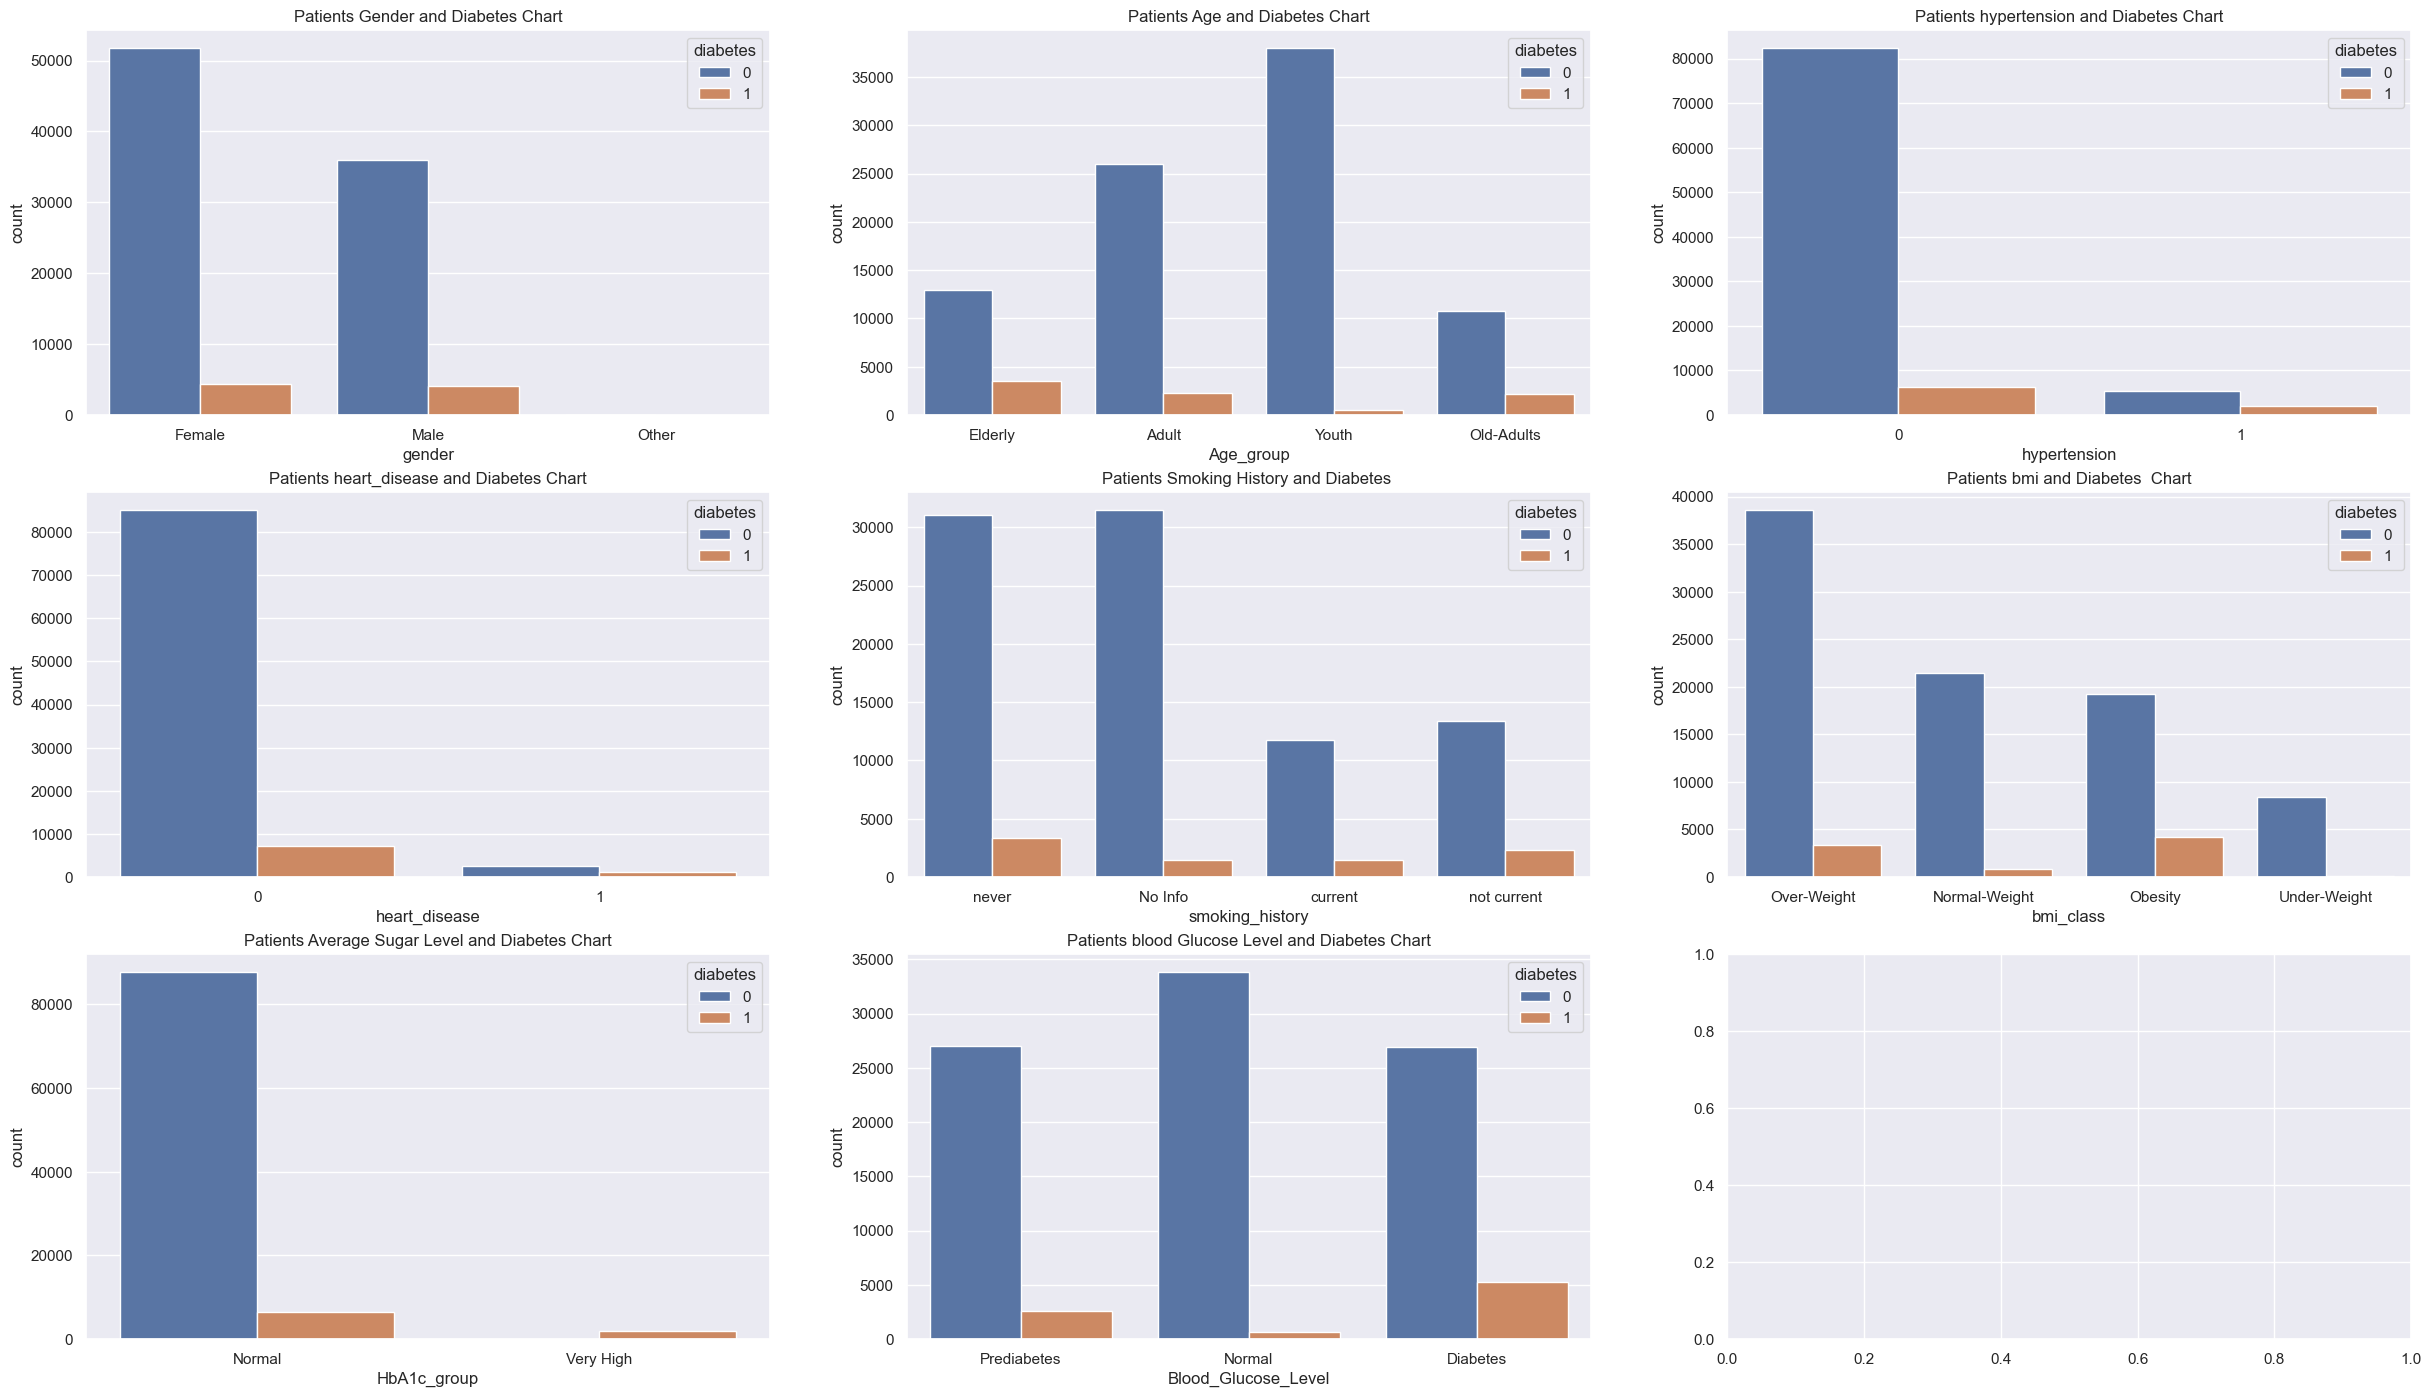

In [44]:
# Exploring different features against themselves to glean possible insights

# Reviewing and Visualizing Gender and Diabetes Columns 
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30,17))
sns.countplot(x="gender", data=df, hue="diabetes", ax=axs[0,0])
axs[0,0].set_title("Patients Gender and Diabetes Chart")

# Reviewing and Visualizing Age Group and Diabetes Columns
sns.countplot(x= "Age_group", data=df, hue="diabetes", ax=axs[0,1])
axs[0,1].set_title("Patients Age and Diabetes Chart")

# Reviewing and Visualizing Hypertension and Diabetes Columns
sns.countplot(x= "hypertension", data=df, hue="diabetes", ax=axs[0,2])
axs[0,2].set_title("Patients hypertension and Diabetes Chart")

# Reviewing and Visualizing Heart Disease and Diabetes Columns
sns.countplot(x= "heart_disease", data=df, hue="diabetes", ax=axs[1,0])
axs[1,0].set_title("Patients heart_disease and Diabetes Chart")

# Reviewing and Visualizing Smoking History and Diabetes Columns
sns.countplot(x= "smoking_history", data=df, hue="diabetes", ax=axs[1,1])
axs[1,1].set_title("Patients Smoking History and Diabetes ")

# Reviewing and Visualizing BMI Class and Diabetes Columns
sns.countplot(x= "bmi_class", data=df, hue="diabetes", ax=axs[1,2])
axs[1,2].set_title("Patients bmi and Diabetes  Chart")

# Reviewing and Visualizing Average Sugar Level and Diabetes Columns
sns.countplot(x="HbA1c_group", data=df, hue="diabetes", ax=axs[2,0])
axs[2,0].set_title("Patients Average Sugar Level and Diabetes Chart")

# Reviewing and Visualizing Blood Glucose Level and Diabetes Columns
sns.countplot(x= "Blood_Glucose_Level", data=df, hue="diabetes", ax=axs[2,1])
axs[2,1].set_title("Patients blood Glucose Level and Diabetes Chart");

Reviewing the individual features with diabetes column, a lot of the features have very low indication of diabetes as shown above, however this could be because we have more patients without diabetes under review as the initial diabetes column reflected this unequal balance. 

### Encoding categorical variables
#### Using Label Encoding

In [47]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'Age_group',
       'bmi_class', 'HbA1c_group', 'Blood_Glucose_Level'],
      dtype='object')

In [48]:
# Dropping the extra columns
df.drop(columns = ['Age_group','HbA1c_group', 'Blood_Glucose_Level', 'bmi_class'], inplace=True)
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [49]:
#  Encoding the categorical variables using the label encoder

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for c in df.columns[0:]:
    if (df[c].dtypes=='object'):
        df[c] = encoder.fit_transform(df[c])
    else: 
        df[c] = df[c]

df.head()
    

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,2,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,2,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [50]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.794326,0.077601,0.040803,1.341595,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.462948,0.267544,0.197833,1.111263,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,2.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,2.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,3.000000,95.690000,9.000000,300.000000,1.000000


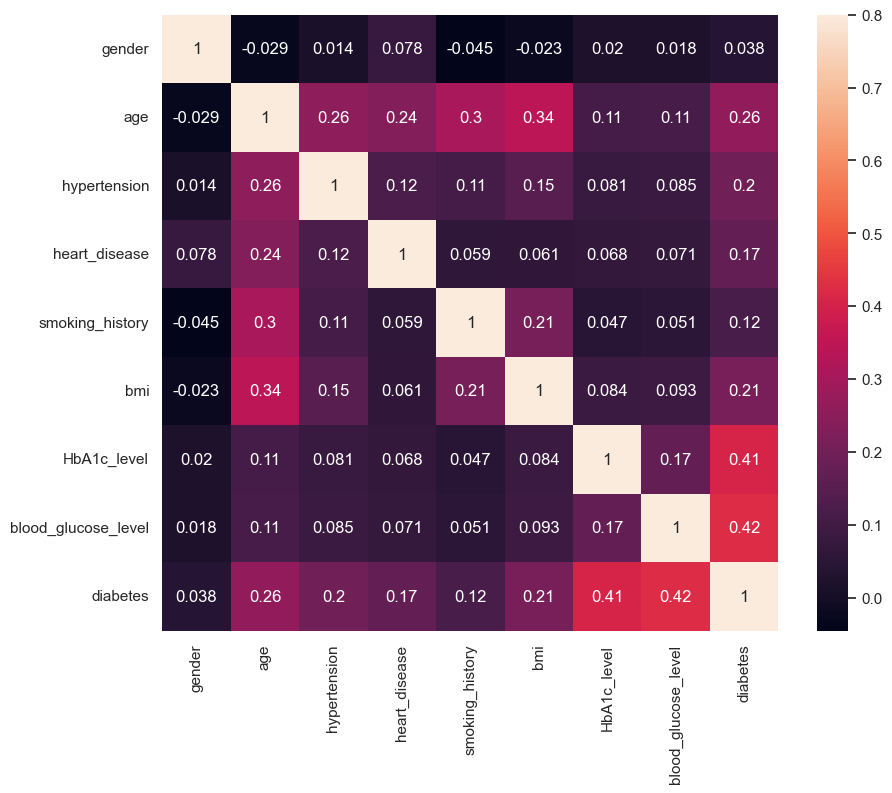

In [64]:
# Correlation between diabetes and other features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmax=0.8, square = True, annot = True);

1 indicates a perfect positive correlation. -1 indicates a perfect negative correlation. while 0 indicates no correlation.

Key Positive Correlations: Diabetes is positively correlated with 
1. HbA1c_level (0.41): indicating that higher average blood sugar  levels are associated with a higher likelihood of diabetes.
2. Blood_glucose_level (0.42): Suggesting that increased blood glucose levels are a strong indicator of diabetes.
3. Age (0.26): Suggests that older individuals are slightly more likely to have diabetes.

Moderate Correlations
1. Bmi and age (0.34): Older individuals tend to have slightly higher BMI.
2. Bmi and smoking_history (0.21): Suggests a slight relationship between BMI and smoking history.
3. Age and smoking_history (0.3): suggests that Older individuals are more likely to have a smoking history.

Weak Correlations
Heart_disease has a weak correlation with all other variables, such as blood glucose level (0.071), indicating a slight relationship. 
Hypertension and blood sugar level (0.085) show a minor association.

Gender shows negligible correlation with most features, indicating no strong association between gender and other factors in this dataset.

In [67]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,2,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0


### Machine Learning

#### Data splitting and Feature scaling

In [70]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,2,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0


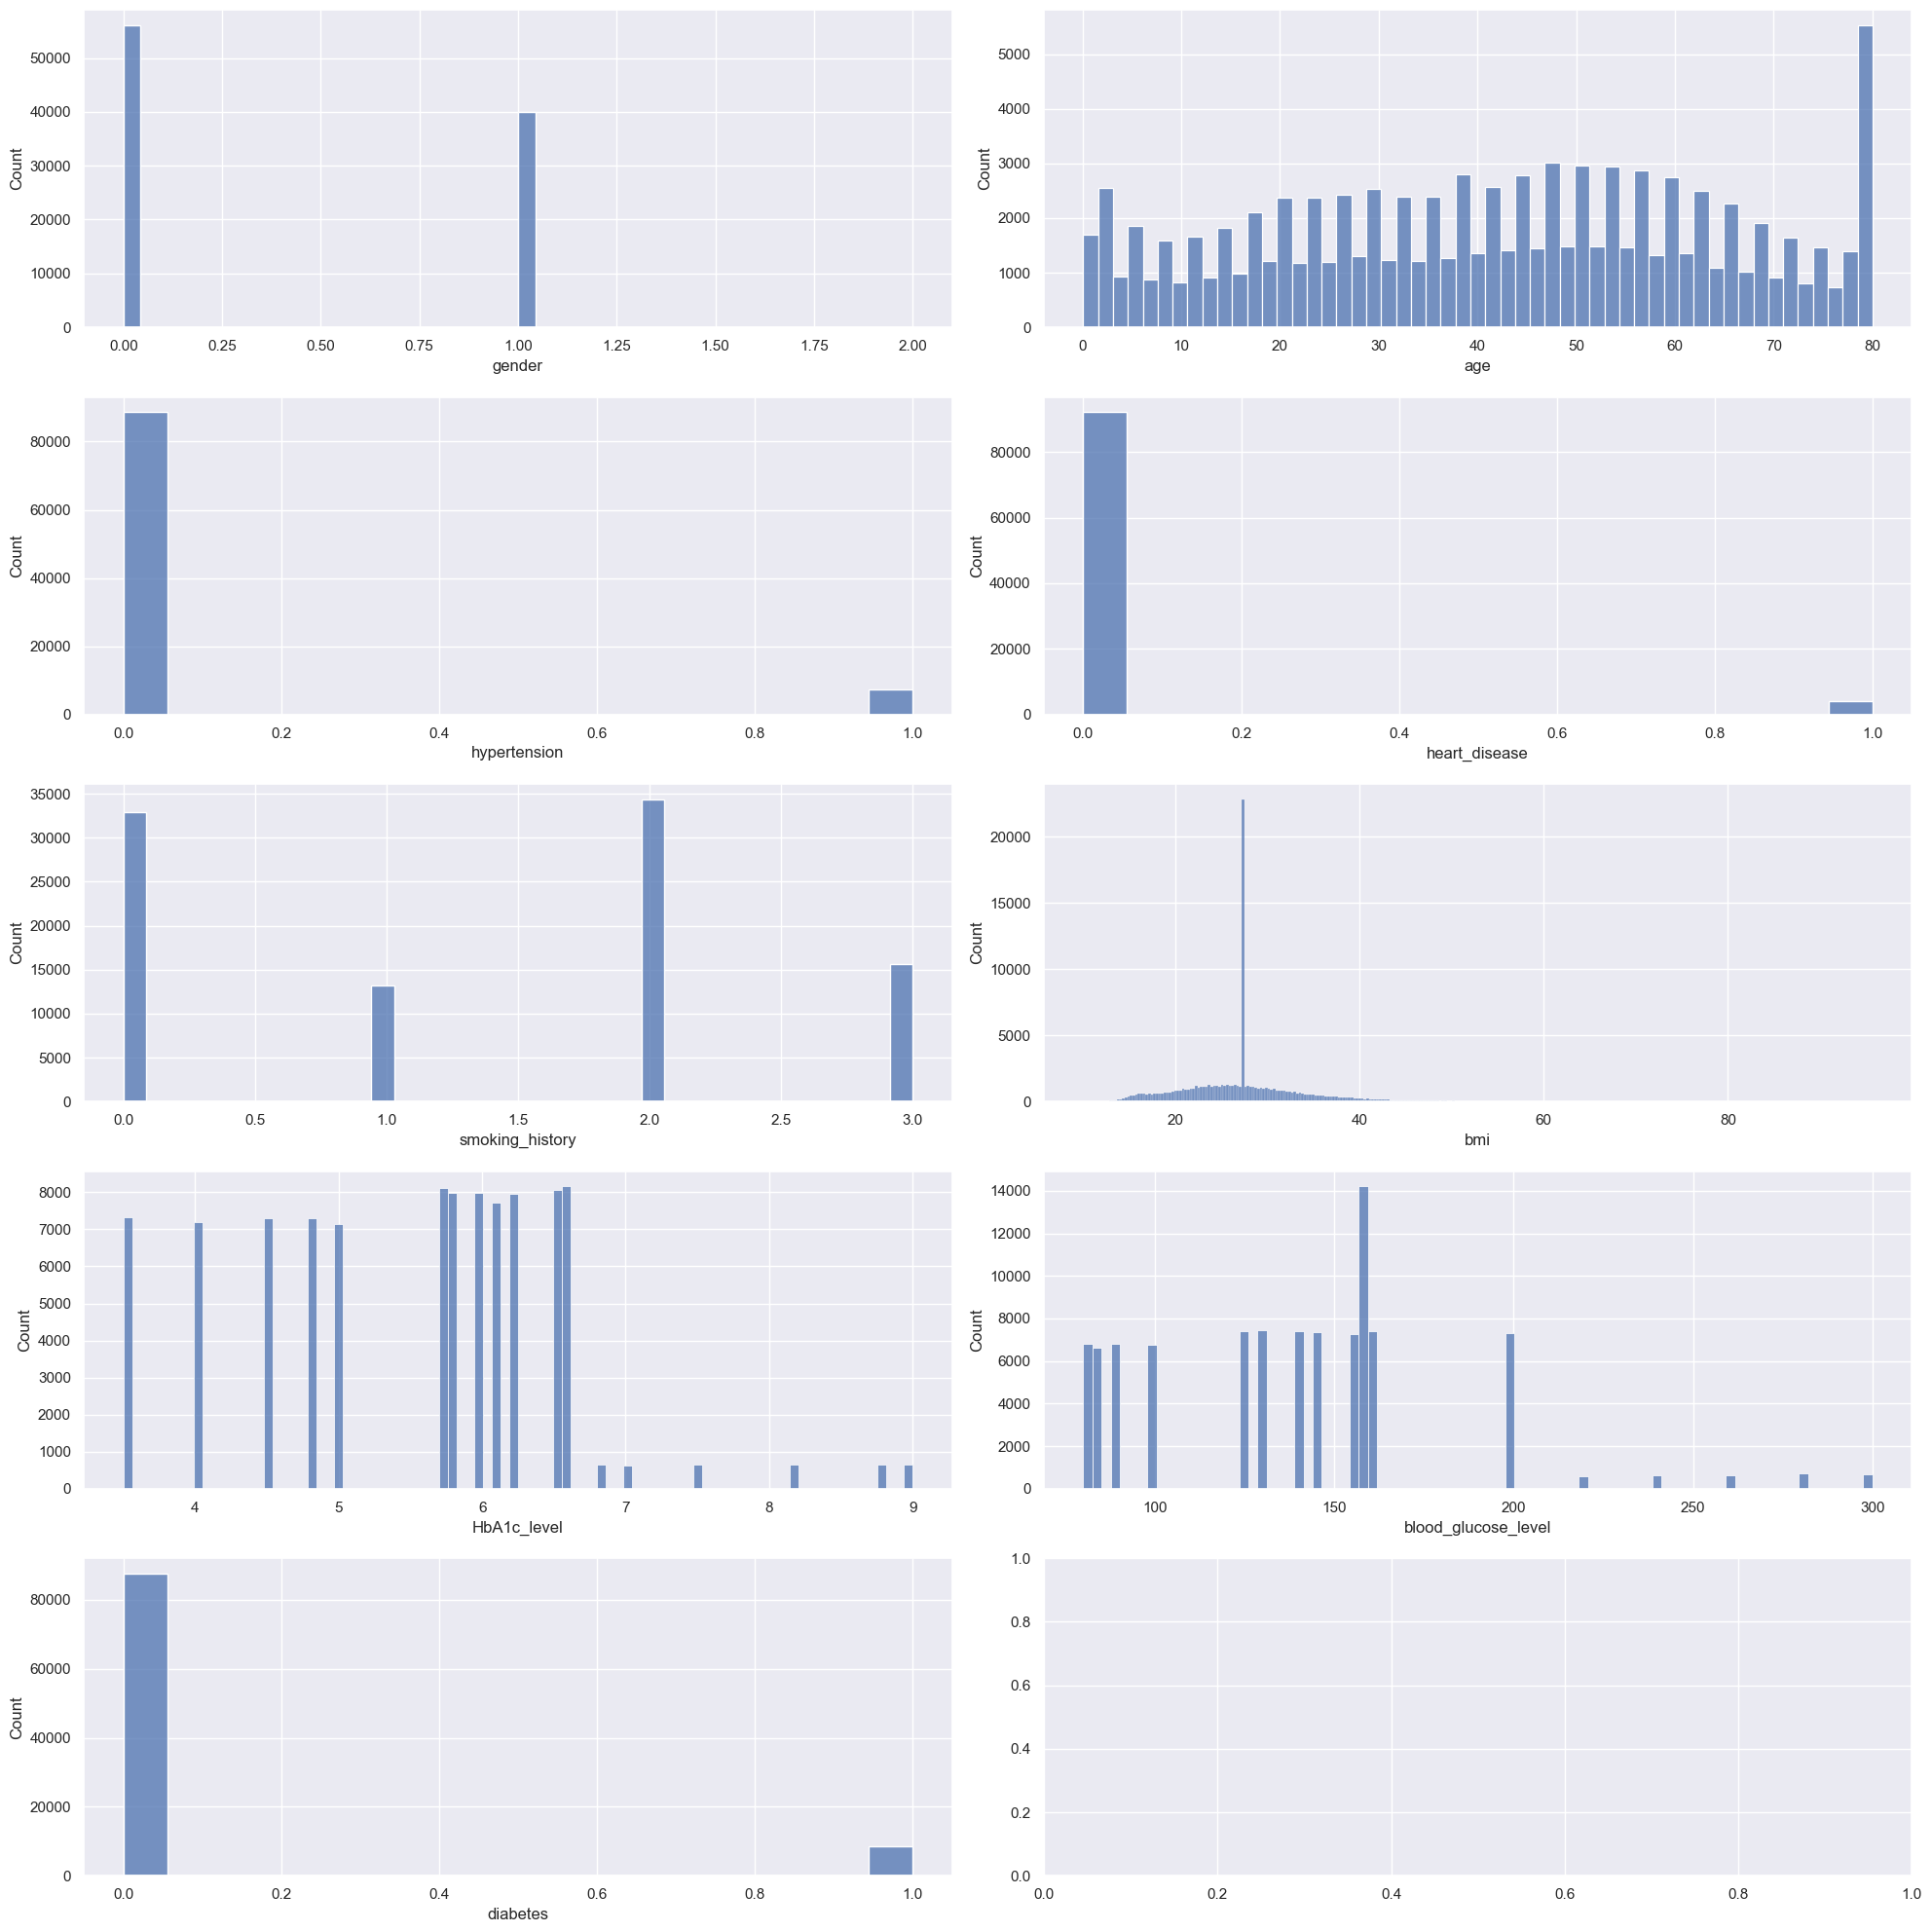

In [72]:
# Reviewing and Visualizing the data distribution

fig, position = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
position = position.flatten()

for index, column_name in enumerate(df.select_dtypes(include="number")):
    sns.histplot(df[column_name], ax=position[index])

plt.tight_layout()
plt.show()

Most of the continuous variables (HbA1c Level, Blood Glucose Level, BMI, age) are slightly right-skewed, while majority of the categorical variables (Gender, Hypertension, Heart Disease, and Diabetes) are highly imbalanced, meaning one category dominates. This does not indicate skewness but rather class imbalance.

Therefore, we'll make an attempt to address the class imbalance in the dataset and also attempt to address the skewedness in the continous variable using the StandardScaler.


In [75]:
# Handling outliers using normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["scaled_HbA1c_level"] = scaler.fit_transform(df["HbA1c_level"].values.reshape(-1,1))
df["scaled_blood_glucose_level"] = scaler.fit_transform(df["blood_glucose_level"].values.reshape(-1,1))
df["scaled_bmi"] = scaler.fit_transform(df["bmi"].values.reshape(-1,1))
df["scaled_age"] = scaler.fit_transform(df["age"].values.reshape(-1,1))
df.drop(["HbA1c_level", "blood_glucose_level", "bmi", "age"], axis = 1, inplace=True); 

In [77]:
df.head()

,gender,hypertension,heart_disease,smoking_history,diabetes,scaled_HbA1c_level,scaled_blood_glucose_level,scaled_bmi,scaled_age
0,0,0,1,2,0,0.994563,0.043554,-0.314947,1.700840
1,0,0,0,0,0,0.994563,-1.423096,-0.000216,0.543372
2,1,0,0,2,0,0.155970,0.483549,-0.000216,-0.614096
3,0,0,0,1,0,-0.496269,0.410216,-0.572051,-0.257952
4,1,1,1,1,0,-0.682623,0.410216,-1.061141,1.522768


In [79]:
# Separating the data into feature and Target, The target being the diabetes column

label = df["diabetes"]

features = df.drop("diabetes", axis=1)

In [81]:
df.drop("diabetes", axis=1)

,gender,hypertension,heart_disease,smoking_history,scaled_HbA1c_level,scaled_blood_glucose_level,scaled_bmi,scaled_age
0,0,0,1,2,0.994563,0.043554,-0.314947,1.700840
1,0,0,0,0,0.994563,-1.423096,-0.000216,0.543372
2,1,0,0,2,0.155970,0.483549,-0.000216,-0.614096
3,0,0,0,1,-0.496269,0.410216,-0.572051,-0.257952
4,1,1,1,1,-0.682623,0.410216,-1.061141,1.522768
...,...,...,...,...,...,...,...,...
99994,0,0,0,0,-0.682623,0.165775,-0.402126,-0.257952
99996,0,0,0,0,0.901386,-0.934213,-1.470439,-1.771563
99997,1,0,0,3,0.155970,0.410216,0.075142,1.077588
99998,0,0,0,2,-1.428039,-0.934213,1.196649,-0.792168


In [83]:
df

,gender,hypertension,heart_disease,smoking_history,diabetes,scaled_HbA1c_level,scaled_blood_glucose_level,scaled_bmi,scaled_age
0,0,0,1,2,0,0.994563,0.043554,-0.314947,1.700840
1,0,0,0,0,0,0.994563,-1.423096,-0.000216,0.543372
2,1,0,0,2,0,0.155970,0.483549,-0.000216,-0.614096
3,0,0,0,1,0,-0.496269,0.410216,-0.572051,-0.257952
4,1,1,1,1,0,-0.682623,0.410216,-1.061141,1.522768
...,...,...,...,...,...,...,...,...,...
99994,0,0,0,0,0,-0.682623,0.165775,-0.402126,-0.257952
99996,0,0,0,0,0,0.901386,-0.934213,-1.470439,-1.771563
99997,1,0,0,3,0,0.155970,0.410216,0.075142,1.077588
99998,0,0,0,2,0,-1.428039,-0.934213,1.196649,-0.792168


In [85]:
# Dividing the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [87]:
X_train

,gender,hypertension,heart_disease,smoking_history,scaled_HbA1c_level,scaled_blood_glucose_level,scaled_bmi,scaled_age
46612,0,0,0,0,0.994563,0.410216,0.621858,-0.302470
31612,0,0,0,0,-1.428039,-0.200888,-1.792558,-1.842792
96143,0,0,0,1,0.901386,-0.934213,-0.948842,0.810480
95691,1,0,0,2,0.435501,-0.200888,-0.040111,1.077588
37658,1,0,0,3,-0.682623,0.165775,-0.483395,0.276264
...,...,...,...,...,...,...,...,...
6284,0,0,0,0,0.435501,0.532437,-0.999081,-1.326383
56182,1,0,0,3,0.155970,0.532437,0.150500,0.899516
79353,0,1,0,2,0.528678,1.510204,-0.014992,0.632408
860,0,0,0,2,0.621855,0.483549,-0.348932,-0.213434


### Addressing the Class imbalance

It was observed earlier that our dataset is imbalanced especially the categorical variables, In addressing that class imbalance, we are deciding to manually assign some class weight to the data.

              precision    recall  f1-score   support

           0    0.97731   0.94968   0.96330     17509
           1    0.60244   0.77571   0.67818      1721

    accuracy                        0.93411     19230
   macro avg    0.78987   0.86270   0.82074     19230
weighted avg    0.94376   0.93411   0.93778     19230



Text(0.5, 20.049999999999997, 'Actual Value')

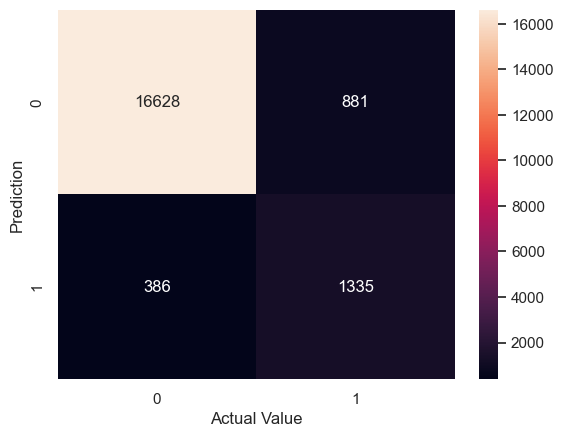

In [90]:
# Initialize the model

from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(random_state=42, class_weight={0:1, 1:4})

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)

sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     17509
           1       0.60      0.78      0.68      1721

    accuracy                           0.93     19230
   macro avg       0.79      0.86      0.82     19230
weighted avg       0.94      0.93      0.94     19230



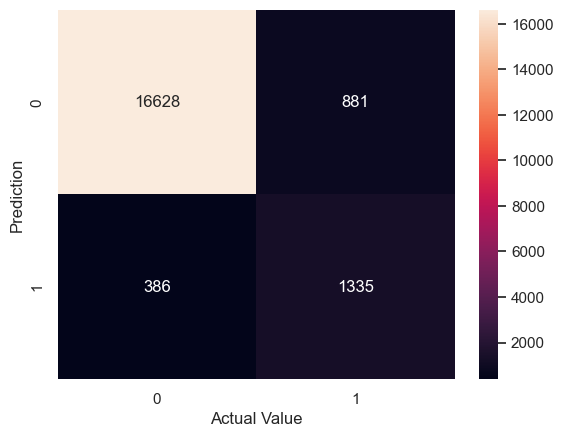

<-- Support Vector Machine -->
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     17509
           1       0.71      0.77      0.74      1721

    accuracy                           0.95     19230
   macro avg       0.85      0.87      0.86     19230
weighted avg       0.95      0.95      0.95     19230



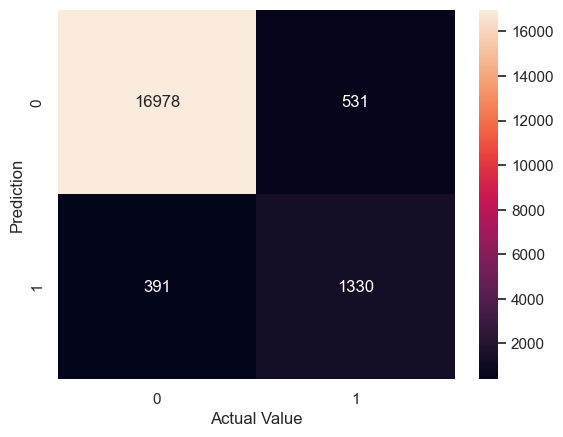

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     17509
           1       0.58      0.79      0.67      1721

    accuracy                           0.93     19230
   macro avg       0.78      0.87      0.81     19230
weighted avg       0.94      0.93      0.93     19230



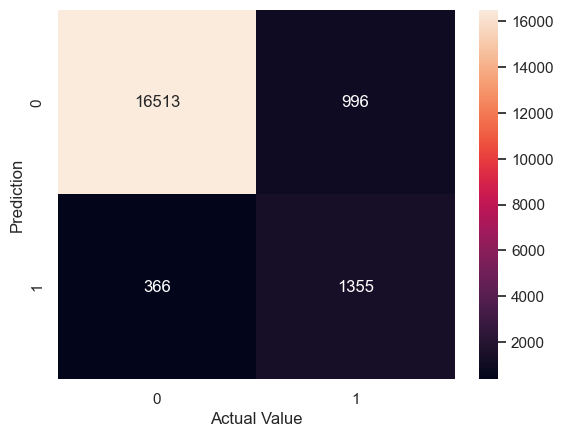

<-- k-Nearest Neighbors -->
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.89      0.62      0.73      1721

    accuracy                           0.96     19230
   macro avg       0.93      0.81      0.85     19230
weighted avg       0.96      0.96      0.96     19230



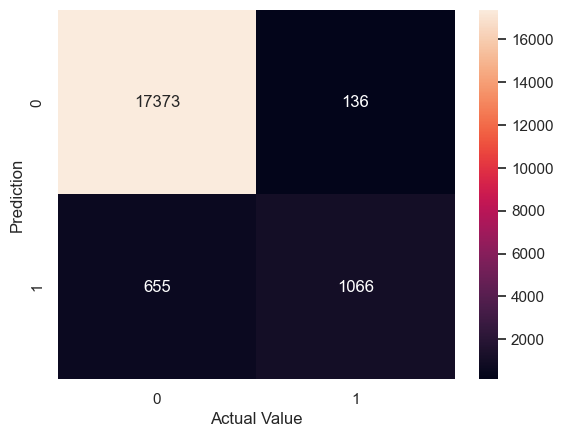

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17509
           1       0.71      0.73      0.72      1721

    accuracy                           0.95     19230
   macro avg       0.84      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



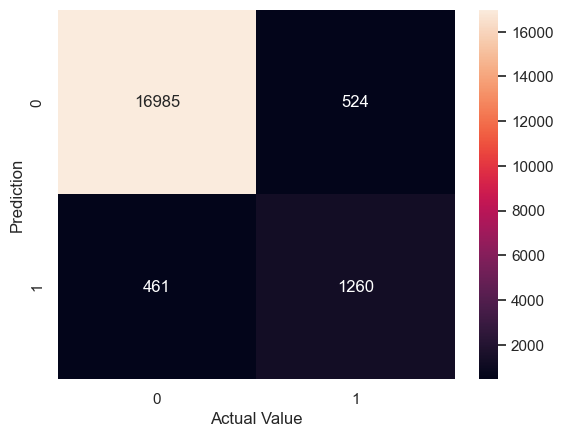

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.94      0.69      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



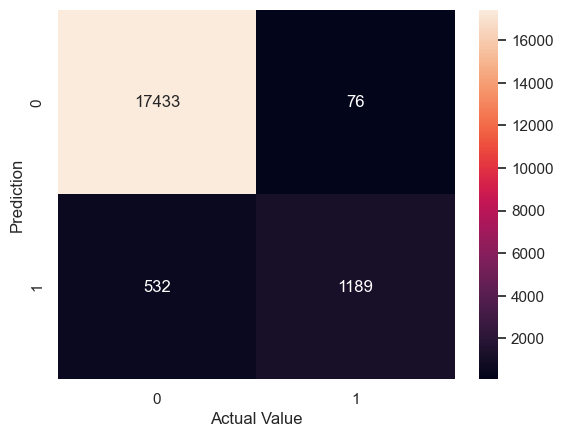

<-- Gradient Boosting -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.98      0.69      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



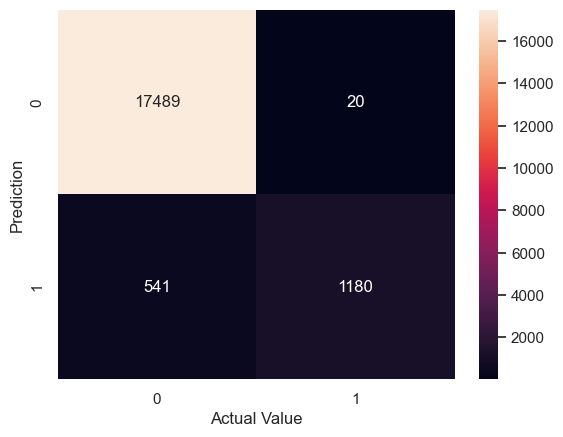

<-- AdaBoost -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       1.00      0.67      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



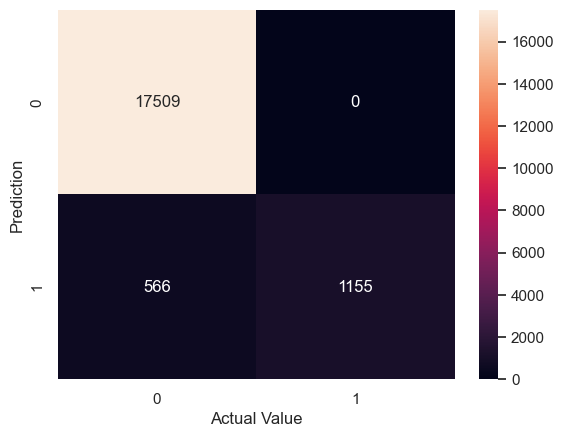

<-- XGBoost -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.96      0.69      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.97      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



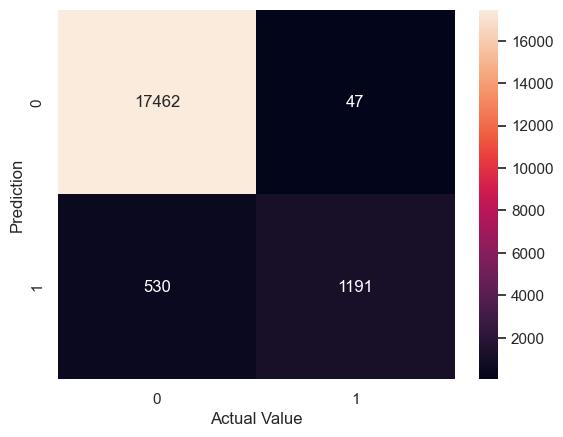

In [92]:
# Trying other classification models

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# !pip install xgboost
from xgboost import XGBClassifier

class_weights = {0: 1, 1: 4} 

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
    [KNeighborsClassifier(), 'k-Nearest Neighbors'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.ylabel("Prediction")
    plt.xlabel("Actual Value")
    plt.show()   


The model performances above have Decision Tree and SVM as the best performing models with the recall (of 73% and 77% respectively) better than the others. This still needs to improve as the project is intended to predict patients with diabetes.

The poor performance may be due to the class imbalance which we have tried to resolve using weights.

In order to improve the model's performance, we intend to oversample the minority class to balance with the majority class, this is to have better recall classification metrics

### Oversampling

In [95]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [96]:
# Apply SMOTE to oversample the minority class

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [97]:
y_resampled.value_counts()

diabetes
0    87664
1    87664
Name: count, dtype: int64

In [98]:
y_resampled.value_counts(normalize=True)*100

diabetes
0    50.0
1    50.0
Name: proportion, dtype: float64

<Axes: xlabel='diabetes', ylabel='count'>

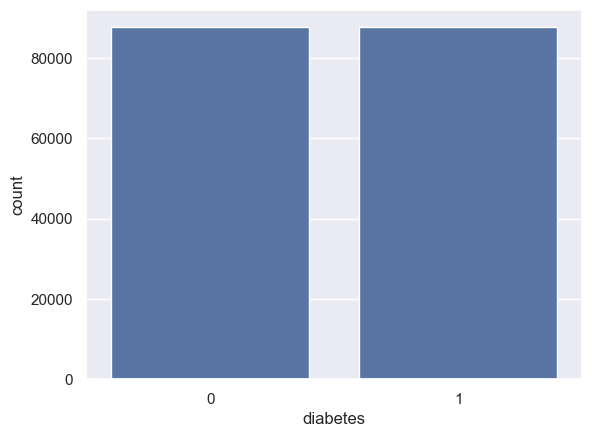

In [99]:
sns.countplot(x=y_resampled)

In [100]:
# Splitting the resampled data

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [101]:
from datetime import datetime

===============Logistic Regression===============
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88     17439
           1       0.89      0.88      0.88     17627

    accuracy                           0.88     35066
   macro avg       0.88      0.88      0.88     35066
weighted avg       0.88      0.88      0.88     35066



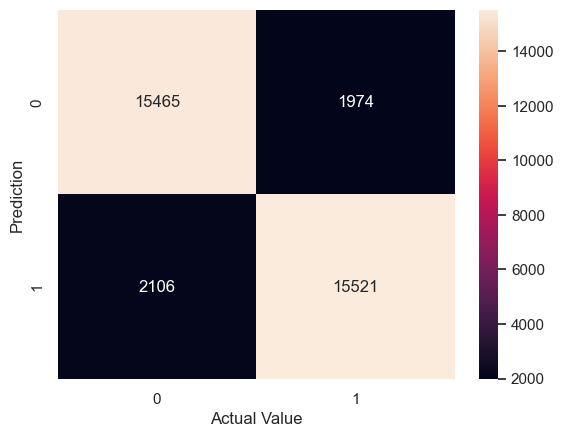

===============Took: 0 seconds to train===============
===============Support Vector Machine===============
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     17439
           1       0.89      0.93      0.91     17627

    accuracy                           0.91     35066
   macro avg       0.91      0.91      0.91     35066
weighted avg       0.91      0.91      0.91     35066



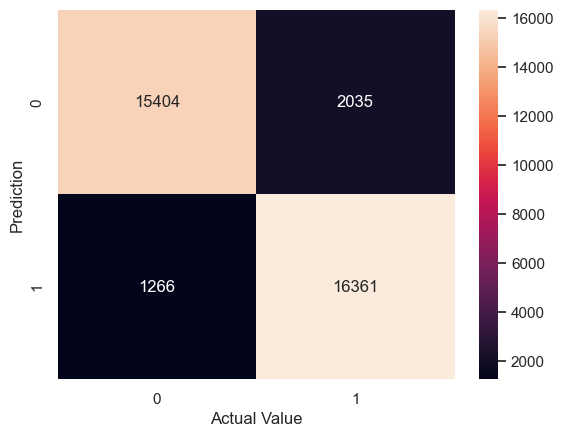

===============Took: 1569 seconds to train===============
===============SGD Classifiers===============
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88     17439
           1       0.89      0.88      0.88     17627

    accuracy                           0.88     35066
   macro avg       0.88      0.88      0.88     35066
weighted avg       0.88      0.88      0.88     35066



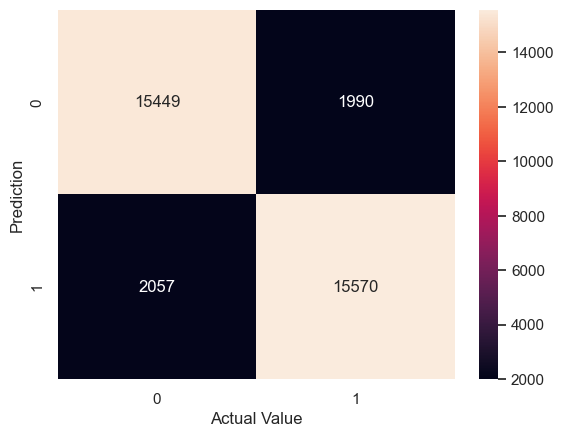

===============Took: 1 seconds to train===============
===============k-Nearest Neighbors===============
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.95     17439
           1       0.92      0.98      0.95     17627

    accuracy                           0.95     35066
   macro avg       0.95      0.95      0.95     35066
weighted avg       0.95      0.95      0.95     35066



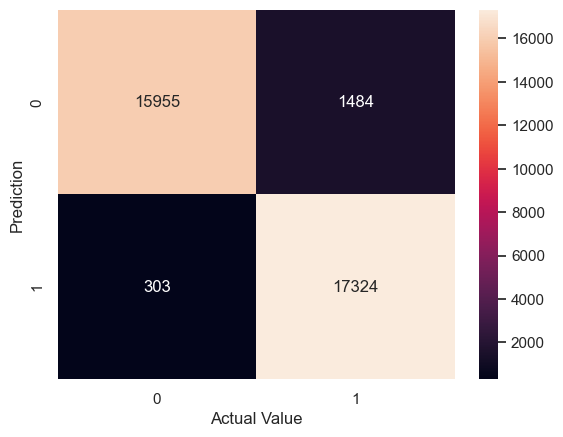

===============Took: 14 seconds to train===============
===============Decision Tree===============
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     17439
           1       0.96      0.97      0.96     17627

    accuracy                           0.96     35066
   macro avg       0.96      0.96      0.96     35066
weighted avg       0.96      0.96      0.96     35066



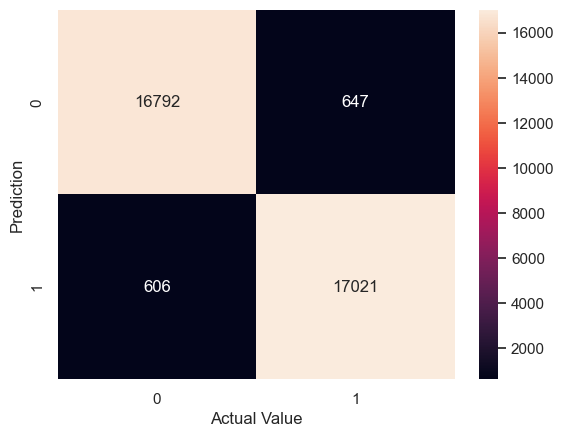

===============Took: 2 seconds to train===============
===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     17439
           1       0.98      0.98      0.98     17627

    accuracy                           0.98     35066
   macro avg       0.98      0.98      0.98     35066
weighted avg       0.98      0.98      0.98     35066



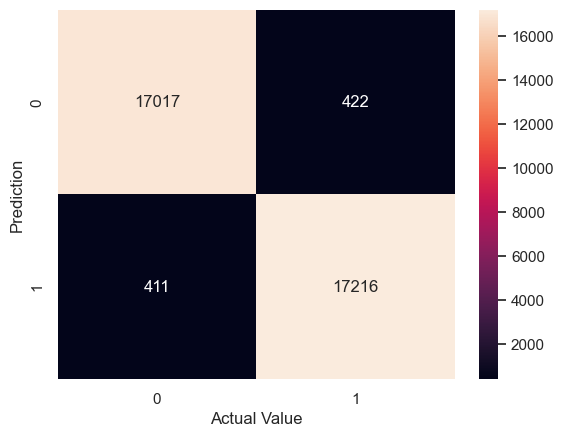

===============Took: 43 seconds to train===============
===============Gradient Boosting===============
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     17439
           1       0.97      0.95      0.96     17627

    accuracy                           0.96     35066
   macro avg       0.96      0.96      0.96     35066
weighted avg       0.96      0.96      0.96     35066



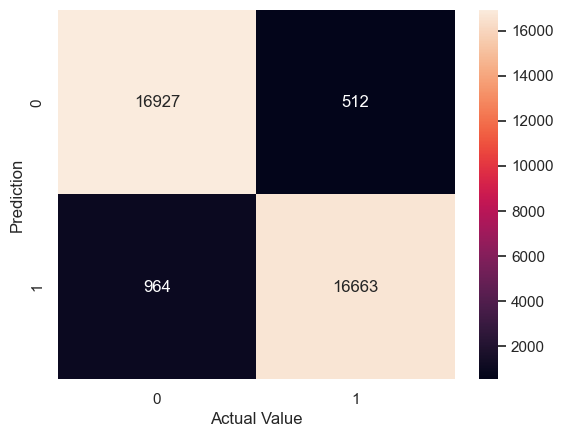

===============Took: 65 seconds to train===============
===============AdaBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91     17439
           1       0.89      0.93      0.91     17627

    accuracy                           0.91     35066
   macro avg       0.91      0.91      0.91     35066
weighted avg       0.91      0.91      0.91     35066



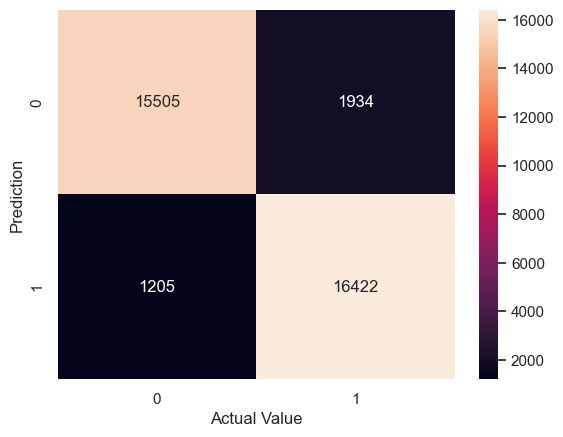

===============Took: 15 seconds to train===============
===============XGBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17439
           1       0.99      0.96      0.98     17627

    accuracy                           0.98     35066
   macro avg       0.98      0.98      0.98     35066
weighted avg       0.98      0.98      0.98     35066



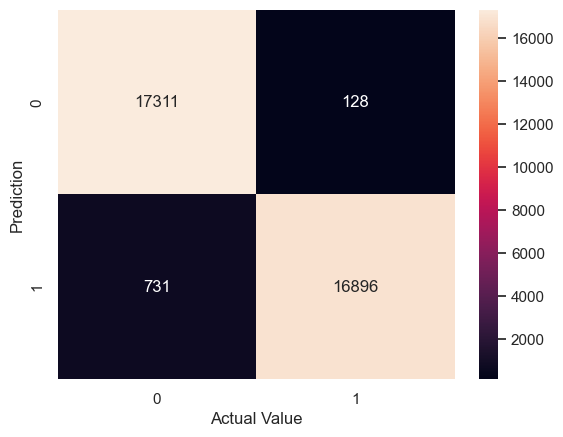

===============Took: 1 seconds to train===============


In [102]:
class_weights = "balanced"

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
    [KNeighborsClassifier(), 'k-Nearest Neighbors'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers:
    begin = datetime.now()
    model_name = classifier[1]
    model = classifier[0]
    print("="*15 + model_name + "=" * 15)
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.ylabel("Prediction")
    plt.xlabel("Actual Value")
    plt.show()
    end = datetime.now()
    timetaken = end-begin
    print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15)

The Random Forest Classifier has better performance of 98% accross all metrics with False prediction of patients with and without diabetes as 411 and 422 respectively



### Feature Importance Ranking and Feature Selection

Considering reducing model size by selecting the most important features and attempting to train the model with it

In [105]:
classifiers

[[LogisticRegression(class_weight='balanced', random_state=42),
  'Logistic Regression'],
 [SVC(class_weight='balanced', random_state=42), 'Support Vector Machine'],
 [SGDClassifier(class_weight='balanced', random_state=42), 'SGD Classifiers'],
 [KNeighborsClassifier(), 'k-Nearest Neighbors'],
 [DecisionTreeClassifier(class_weight='balanced', random_state=42),
  'Decision Tree'],
 [RandomForestClassifier(class_weight='balanced', random_state=42),
  'Random Forest'],
 [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
 [AdaBoostClassifier(algorithm='SAMME', random_state=42), 'AdaBoost'],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='mlogloss',
                feature_types=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_c

In [106]:
# Selecting our classifier (RFC)
classifiers[5]

[RandomForestClassifier(class_weight='balanced', random_state=42),
 'Random Forest']

In [107]:
classifiers[5][0].feature_importances_

array([0.00505108, 0.02349344, 0.00984664, 0.0197377 , 0.35858711,
       0.30554889, 0.09356093, 0.18417421])

In [108]:
features.head(2)

,gender,hypertension,heart_disease,smoking_history,scaled_HbA1c_level,scaled_blood_glucose_level,scaled_bmi,scaled_age
0,0,0,1,2,0.994563,0.043554,-0.314947,1.700840
1,0,0,0,0,0.994563,-1.423096,-0.000216,0.543372


In [109]:
# Feature importance for Random Forest
importances = classifiers[5][0].feature_importances_
importances

array([0.00505108, 0.02349344, 0.00984664, 0.0197377 , 0.35858711,
       0.30554889, 0.09356093, 0.18417421])

In [110]:
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df

,Feature,Importance
0,gender,0.005051
1,hypertension,0.023493
2,heart_disease,0.009847
3,smoking_history,0.019738
4,scaled_HbA1c_level,0.358587
5,scaled_blood_glucose_level,0.305549
6,scaled_bmi,0.093561
7,scaled_age,0.184174


In [111]:
# Sorting by the most important feature

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
4,scaled_HbA1c_level,0.358587
5,scaled_blood_glucose_level,0.305549
7,scaled_age,0.184174
6,scaled_bmi,0.093561
1,hypertension,0.023493
3,smoking_history,0.019738
2,heart_disease,0.009847
0,gender,0.005051


<Axes: xlabel='Importance', ylabel='Feature'>

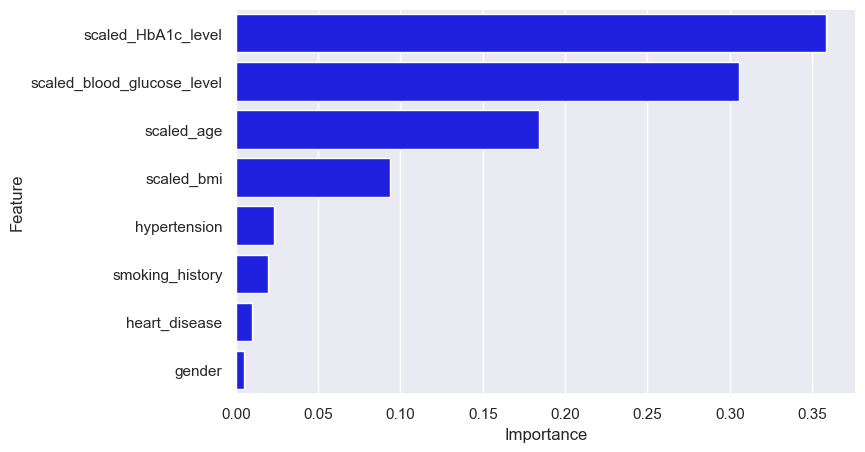

In [112]:
plt.figure(figsize=(8, 5))

sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='blue')